# LGMVIP Task 1 - Iris Flowers Classification

# Importing Libraries

In [89]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from warnings import filterwarnings
filterwarnings('ignore')

# Importing the dataset

In [90]:
df0 = pd.read_csv("iris.data", header=None)
header_list = ["SepalLength", "SepalWidth", "PetalLength", "PetalWidth", "Species"]

# Converting .data file to .csv

In [91]:
df0.to_csv("Iris.csv", header=header_list, index=False)

# Loading and displaying the .csv file

In [92]:
df = pd.read_csv("Iris.csv")
df.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# Exploratory Data Analysis - Dataset Summarization

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SepalLength  150 non-null    float64
 1   SepalWidth   150 non-null    float64
 2   PetalLength  150 non-null    float64
 3   PetalWidth   150 non-null    float64
 4   Species      150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [94]:
df.shape

(150, 5)

In [95]:
df.groupby('Species').size()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

In [96]:
df.describe()

,SepalLength,SepalWidth,PetalLength,PetalWidth
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# Exploratory Data Analysis - Data Visualization

Histograms

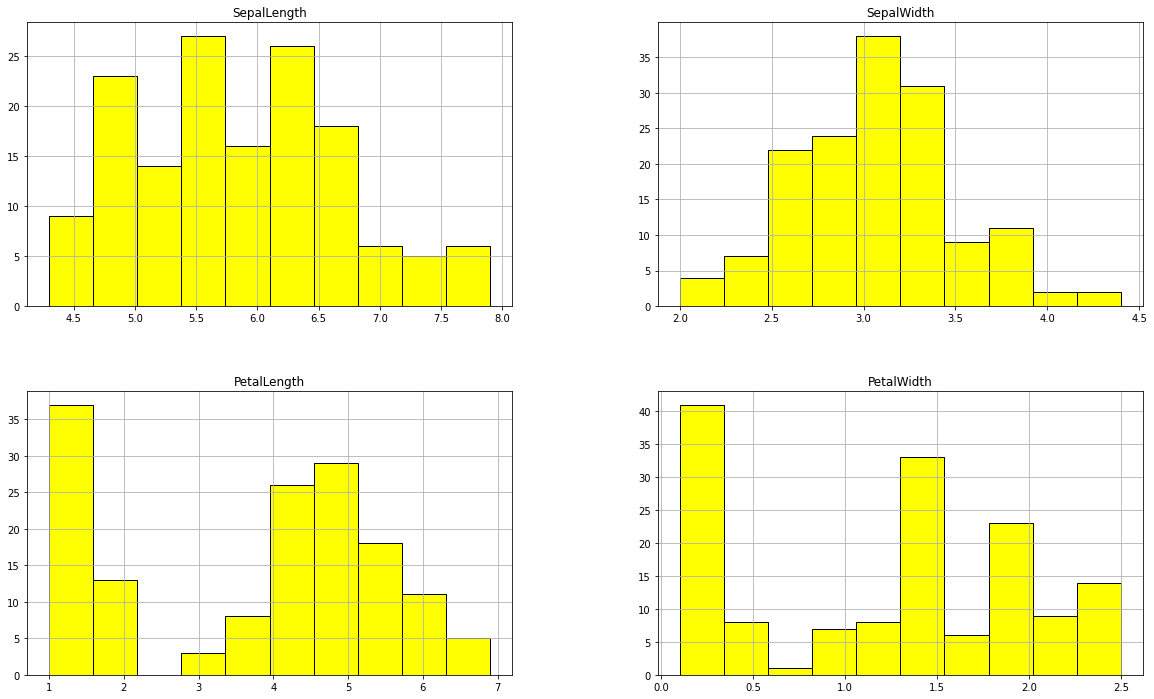

In [97]:
fig = plt.figure(figsize=(20, 12))
df.hist(ax = fig.gca(), color="yellow", edgecolor="black")
plt.show()

Pair Plot

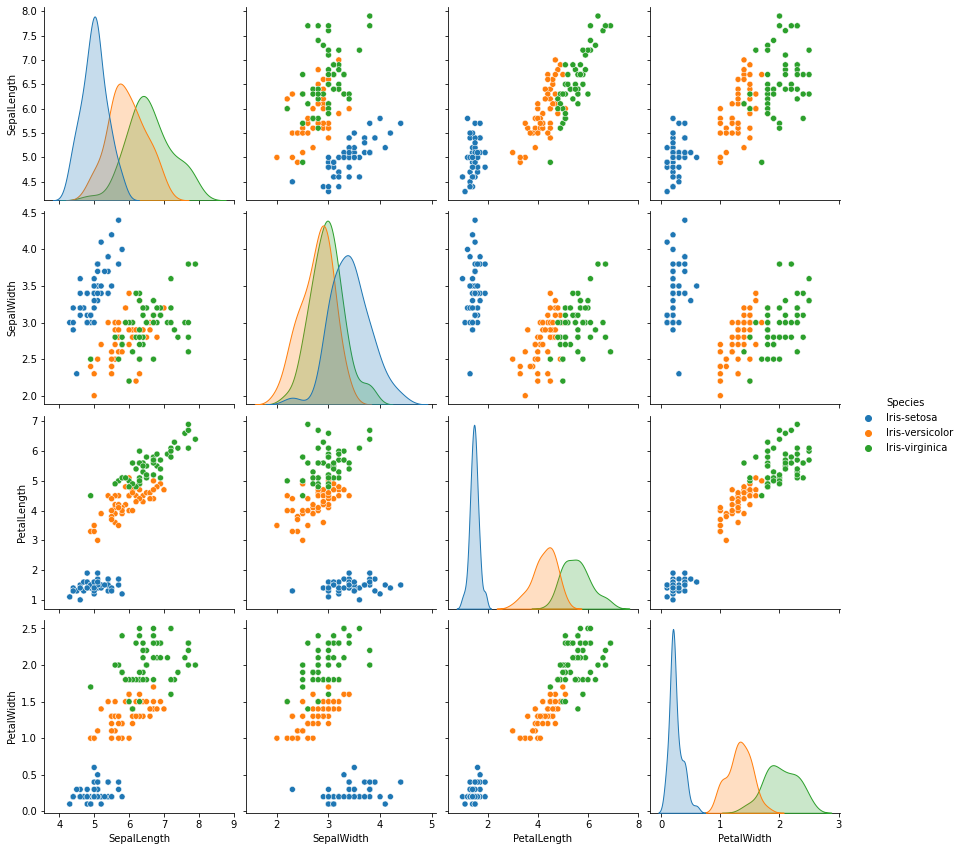

In [98]:
sns.pairplot(df, hue='Species', height=3)
plt.show()

Scatter Plots

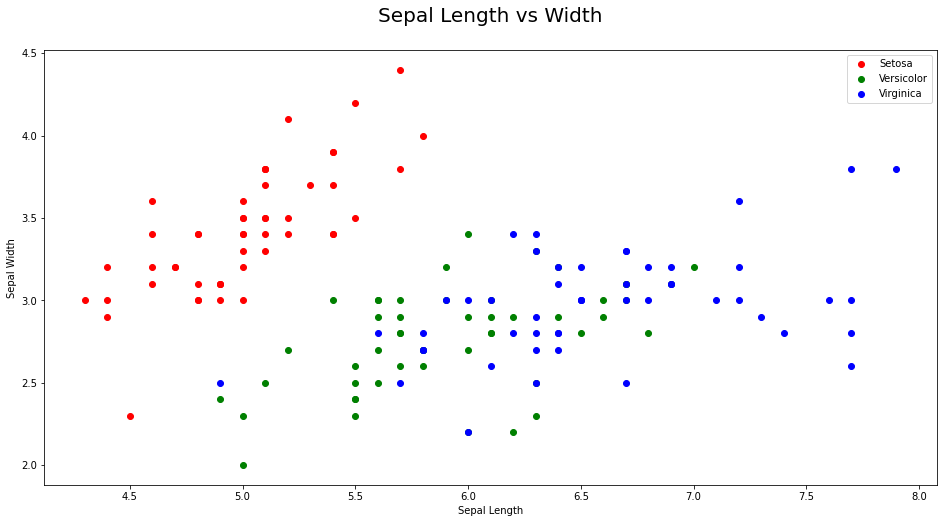

In [99]:
setosa = df[df['Species'] == "Iris-setosa"]
versicolor = df[df['Species'] == "Iris-versicolor"]
virginica = df[df['Species'] == "Iris-virginica"]

plt.figure(figsize=(16, 8))
plt.scatter(setosa['SepalLength'], setosa['SepalWidth'], c="red", label="Setosa")
plt.scatter(versicolor['SepalLength'], versicolor['SepalWidth'], c="green", label="Versicolor")
plt.scatter(virginica['SepalLength'], virginica['SepalWidth'], c="blue", label="Virginica")
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.title("Sepal Length vs Width\n", fontsize=20)
plt.legend()
plt.show()

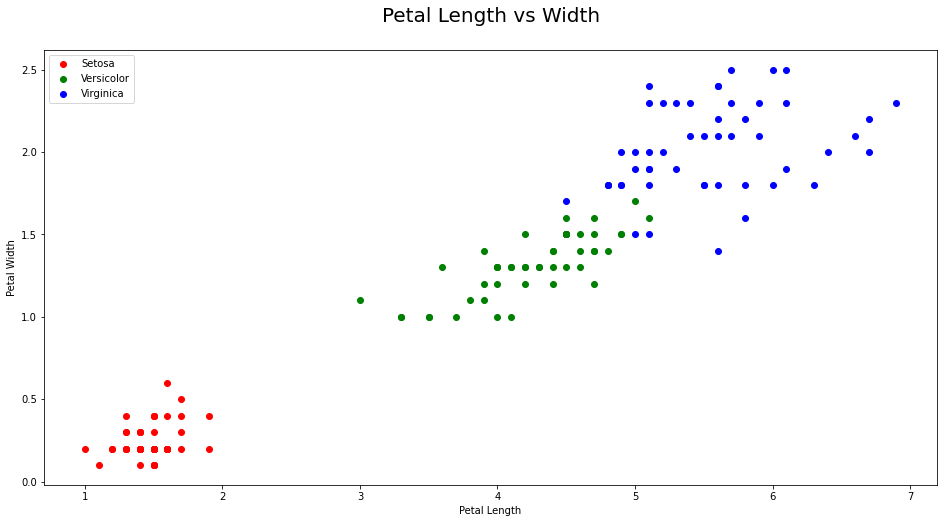

In [100]:
plt.figure(figsize=(16, 8))
plt.scatter(setosa['PetalLength'], setosa['PetalWidth'], c="red", label="Setosa")
plt.scatter(versicolor['PetalLength'], versicolor['PetalWidth'], c="green", label="Versicolor")
plt.scatter(virginica['PetalLength'], virginica['PetalWidth'], c="blue", label="Virginica")
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.title("Petal Length vs Width\n", fontsize=20)
plt.legend()
plt.show()

# Splitting the dataset into dependent and independent variables

In [101]:
X = df.drop(['Species'], 1)
Y = df['Species']

# Encoding categorical data

In [102]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Y = le.fit_transform(Y)

# Splitting the dataset into training and testing set

In [103]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state = 1)

# Importing Models and Metrics

In [104]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

from sklearn.svm import SVC
svm = SVC()

from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()

from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

from sklearn.metrics import accuracy_score

# Training and testing the models

In [105]:
models = [lr, knn, svm, nb, dt, rf]
accu = []
for i in models:
  i.fit(X_train, Y_train)
  pred = i.predict(X_test)
  accu.append(accuracy_score(Y_test, pred))
  print("The accuracy of " + type(i).__name__ + " is", accuracy_score(Y_test, pred))

The accuracy of LogisticRegression is 0.9777777777777777
The accuracy of KNeighborsClassifier is 0.9777777777777777
The accuracy of SVC is 0.9777777777777777
The accuracy of GaussianNB is 0.9333333333333333
The accuracy of DecisionTreeClassifier is 0.9555555555555556
The accuracy of RandomForestClassifier is 0.9555555555555556


# Evaluating the performances

In [107]:
result = pd.DataFrame({'Models': ['Logistic Regression', 'K-Nearest Neighbors', 'Support Vector Machine', 'Naive Bayes', 'Decision Tree', 'Random Forest'], 'Accuracy': accu})

result = result.sort_values(by='Accuracy')
print(result)

                   Models  Accuracy
3             Naive Bayes  0.933333
4           Decision Tree  0.955556
5           Random Forest  0.955556
0     Logistic Regression  0.977778
1     K-Nearest Neighbors  0.977778
2  Support Vector Machine  0.977778
